In [2]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Calculate Count job / Median salary by skills for Data Analyst

df_DA= df[df['job_title_short']=='Data Analyst'].copy()
df_DA = df_DA.explode('job_skills')
df_DA_skills = df_DA.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
    )

df_DA_skills= df_DA_skills.sort_values(by='skill_count',ascending=False).head(10)
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


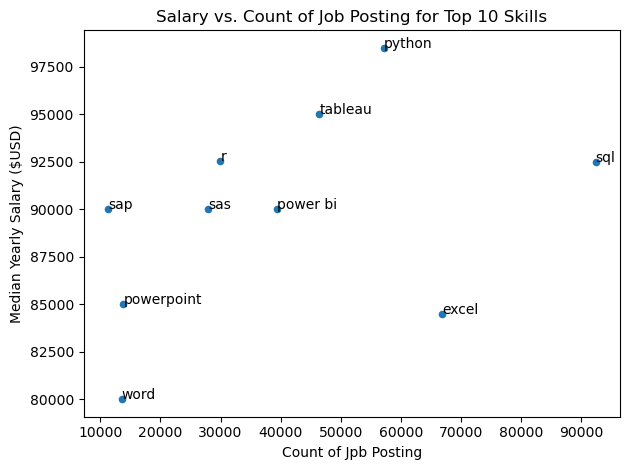

In [14]:
df_DA_skills.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of Jpb Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Posting for Top 10 Skills')
plt.tight_layout()


for i, txt in enumerate(df_DA_skills.index):
    plt.text(df_DA_skills['skill_count'].iloc[i],df_DA_skills['median_salary'].iloc[i],txt)
plt.show()

In [5]:
#  Median Yearly Salary vs. Job Count
#Create a scatter plot to compare the median yearly salary 
# and the number of jobs based on the job_title_short column.
# To create the scatter plot first create a new DataFrame using the groupby() 
# method to aggregate and find the median salary and job count for each job title.
# Annotate each point with the job title name.


df_m_c = df.copy()
df_m_c = df_m_c.groupby('job_title_short').agg(
    job_count =('job_posted_date','count'),
    median_salary1=('salary_year_avg','median')
)
df_m_c=df_m_c.sort_values(by='job_count',ascending=False)

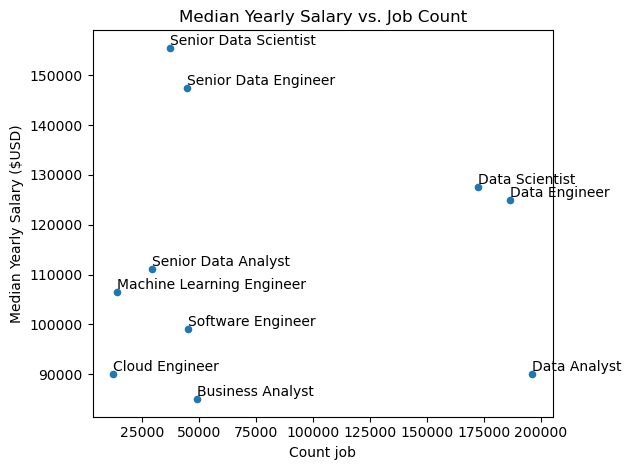

In [ ]:
df_m_c.plot(kind='scatter',x='job_count',y='median_salary1')
plt.xlabel('Count job')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Median Yearly Salary vs. Job Count')

for i, txt in enumerate(df_m_c.index):
    plt.text(df_m_c['job_count'].iloc[i],df_m_c['median_salary1'].iloc[i],txt,ha='left', va='bottom')

plt.tight_layout()
plt.show()

In [44]:
#Problem Statement:
# Create a scatter plot to visualize the relationship between the number of job postings 
# and median yearly salary for the top 7 countries based on highest number of job postings.
#  Annotate each point with the country's name.

df_top_country = df.copy()
df_top_country = df_top_country.groupby('job_country').agg(
    country_count =('job_country','count'),
    median_salary2=('salary_year_avg','median')
)
df_top_country=df_top_country.sort_values(by='country_count',ascending=False).head(7)
df_top_country

,country_count,median_salary2
job_country,,
United States,206292,119187.5
India,51088,111175.0
United Kingdom,40375,104668.0
France,39922,97444.0
Germany,27694,111175.0
Spain,25100,98391.5
Singapore,23696,100500.0


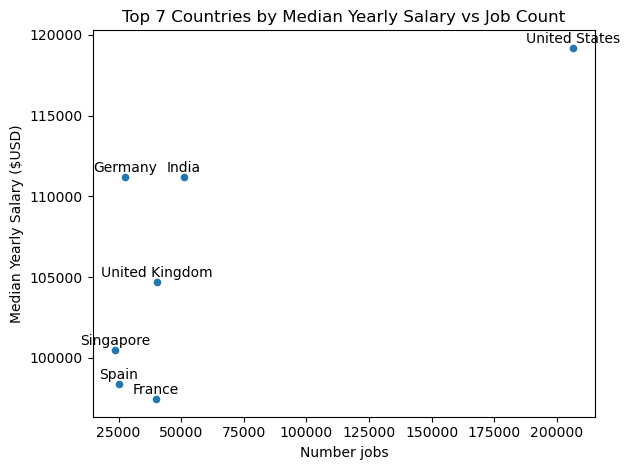

In [52]:
df_top_country.plot(kind='scatter',x='country_count',y='median_salary2')
plt.xlabel('Number jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')

for i, txt in enumerate(df_top_country.index):
    plt.text(df_top_country['country_count'].iloc[i],df_top_country['median_salary2'].iloc[i]+1000,txt,ha='center', va='top')

plt.tight_layout()
plt.show()

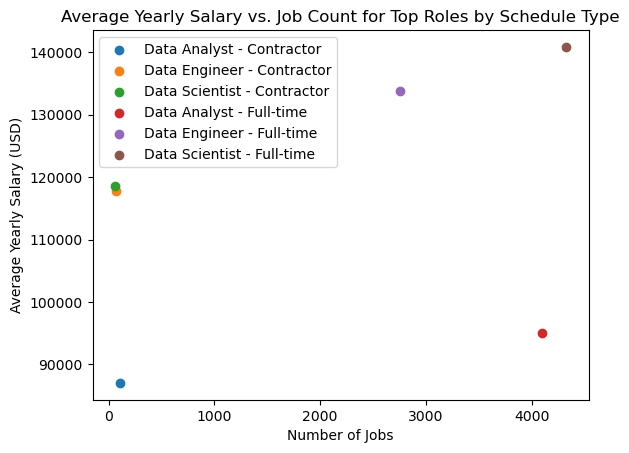

In [53]:
# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()